In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression ,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("data.csv")
df.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1773,2014-06-03 00:00:00,280000.0,2.0,1.50,1480,15641,1.0,0,0,4,1480,0,1940,2001,11405 26th Ave SW,Seattle,WA 98146,USA
1959,2014-06-05 00:00:00,240000.0,3.0,1.00,1150,4825,1.0,0,0,4,1150,0,1957,2001,450 NE Birch St,Issaquah,WA 98027,USA
3063,2014-06-23 00:00:00,579000.0,3.0,2.50,1640,1269,3.0,0,0,3,1640,0,2009,0,129 25th Ave E,Seattle,WA 98112,USA
473,2014-05-12 00:00:00,453246.0,3.0,2.50,2010,2287,2.0,0,0,3,1390,620,2014,0,2500 Mulberry Walk NE,Issaquah,WA 98029,USA
2450,2014-06-13 00:00:00,810000.0,3.0,1.75,1980,13503,1.0,0,2,4,1320,660,1952,0,2622 W Lake Sammamish Pkwy SE,Bellevue,WA 98008,USA
2507,2014-06-13 00:00:00,540000.0,5.0,3.00,3610,9775,2.0,0,0,3,3610,0,2003,0,24760 SE 276th Pl,Maple Valley,WA 98038,USA
673,2014-05-14 00:00:00,470000.0,4.0,2.50,2310,14023,2.0,0,0,3,2310,0,1991,0,14923 280th Pl NE,Duvall,WA 98019,USA
925,2014-05-19 00:00:00,518000.0,3.0,2.50,1680,2096,2.0,0,0,3,1380,300,2008,0,8354 11th Ave NW,Seattle,WA 98117,USA
2247,2014-06-10 00:00:00,307000.0,4.0,1.00,1150,8184,1.5,0,0,3,1150,0,1947,2012,15562 9th Ave NE,Shoreline,WA 98155,USA
1876,2014-06-04 00:00:00,583000.0,6.0,2.75,2630,16411,1.0,0,0,4,1650,980,1974,0,2317-2399 185th Pl NE,Redmond,WA 98052,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df.shape

(4600, 18)

In [5]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [8]:
df.drop(columns=["date","street","city","statezip","country"],inplace=True)
df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
3648,535000.0,3.0,1.00,1580,6300,1.0,0,0,3,1180,400,1925,2002
2685,493000.0,4.0,1.75,2030,18295,1.5,0,0,4,2030,0,1975,0
93,770000.0,3.0,2.00,2350,5700,1.5,0,0,4,1810,540,1939,1989
4061,1049000.0,4.0,3.75,4740,126759,2.0,0,0,4,4740,0,1991,0
1527,472000.0,6.0,2.50,4410,14034,1.0,0,2,4,2350,2060,1965,0


In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [10]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


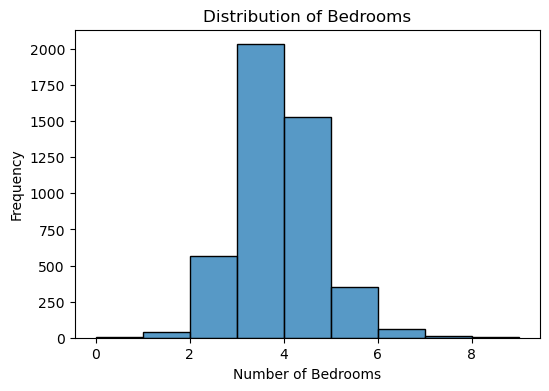

In [18]:
plt.figure(figsize=(6, 4))
sns.histplot(df['bedrooms'], bins=range(int(df['bedrooms'].min()), int(df['bedrooms'].max()) + 1), kde=False)
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

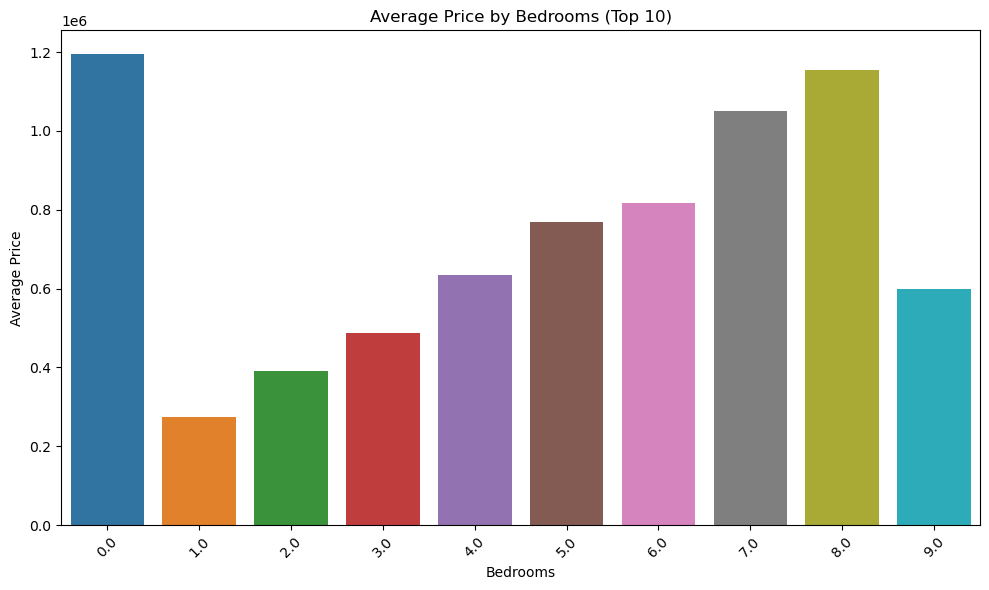

In [24]:
plt.figure(figsize=(10, 6))
avg_price_bedrooms = df.groupby('bedrooms')['price'].mean().sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='bedrooms', y='price', data=avg_price_bedrooms)
plt.title('Average Price by Bedrooms (Top 10)')
plt.xlabel('Bedrooms')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

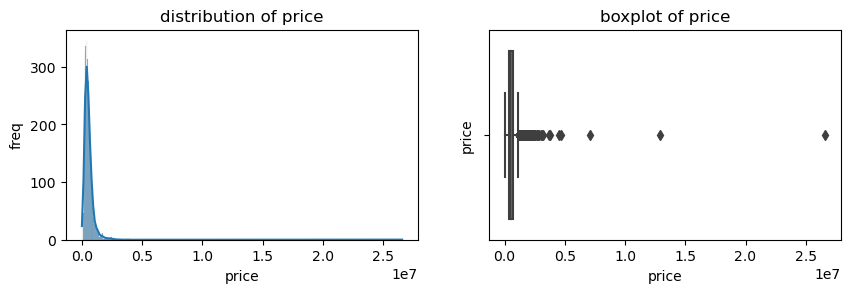

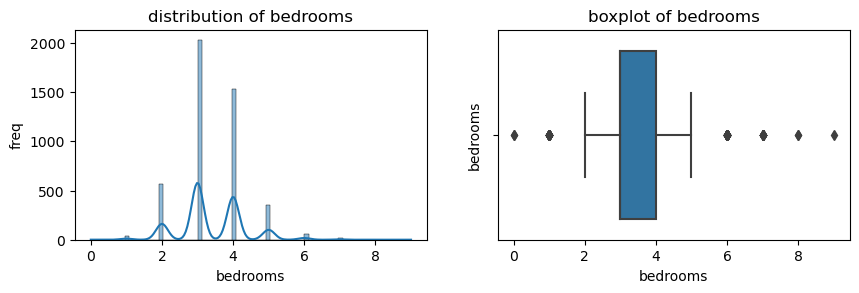

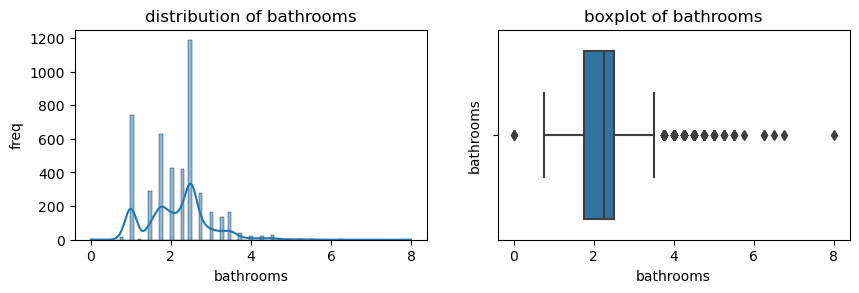

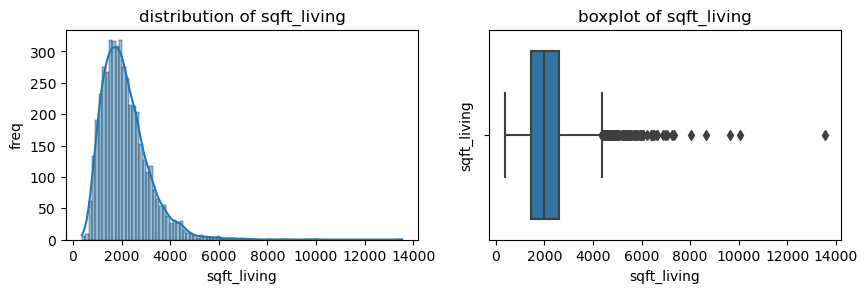

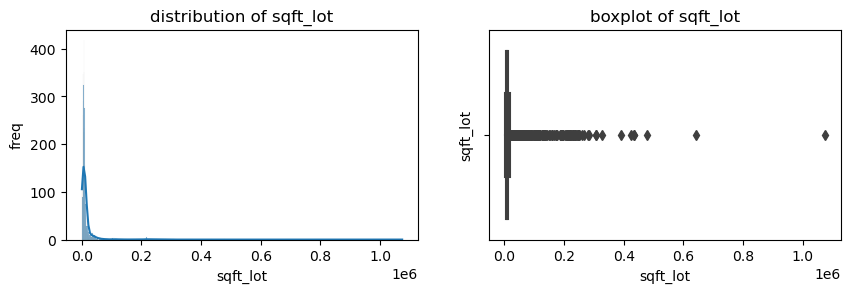

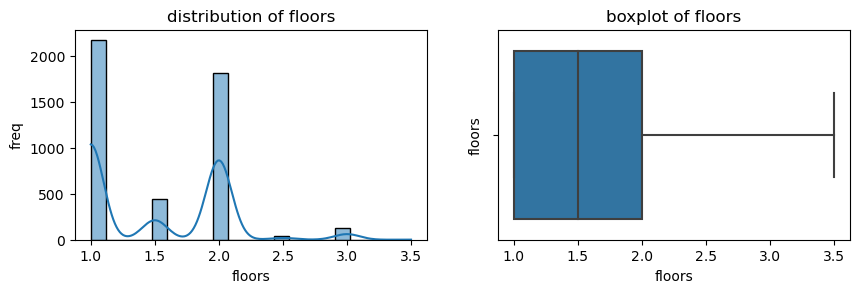

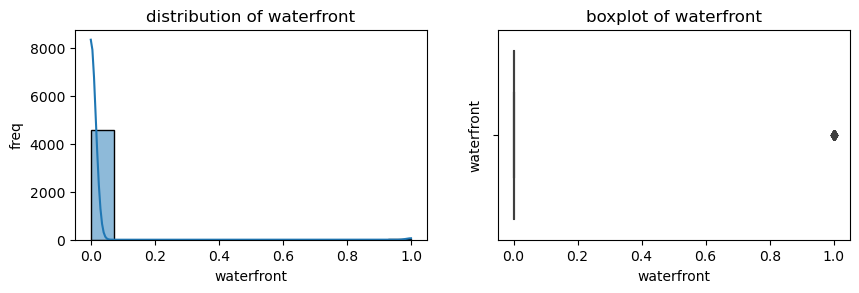

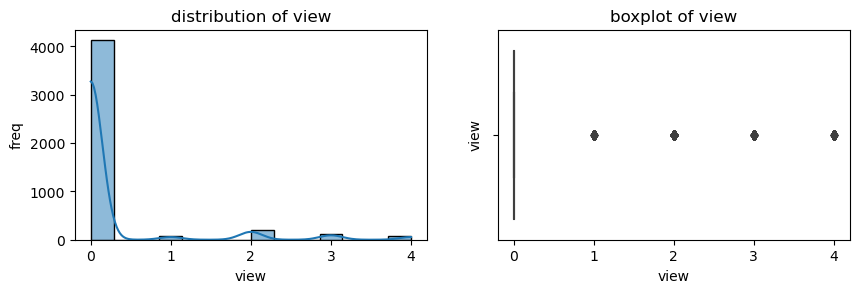

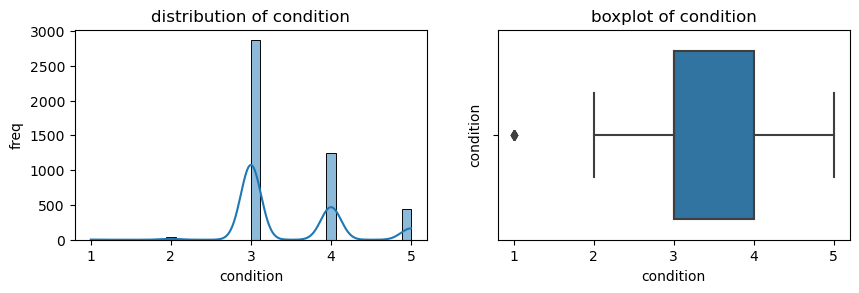

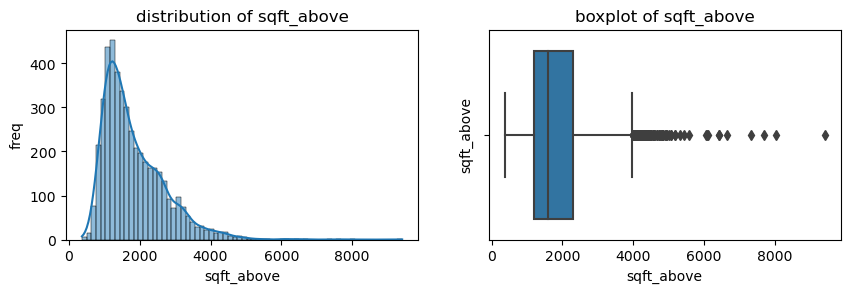

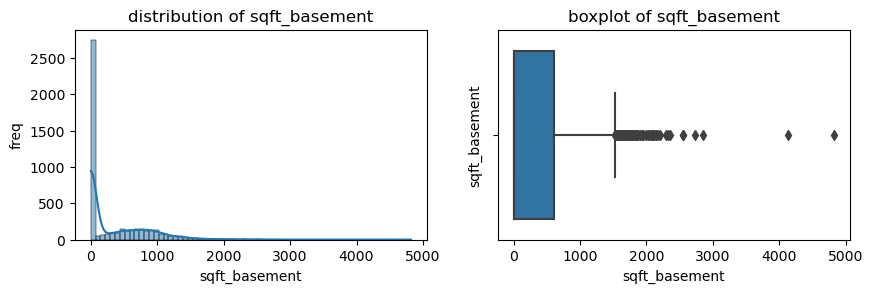

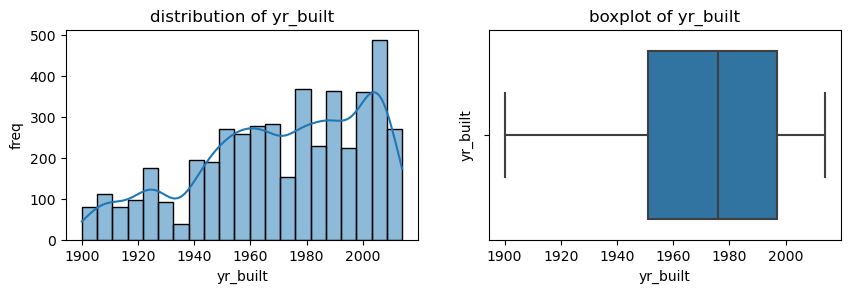

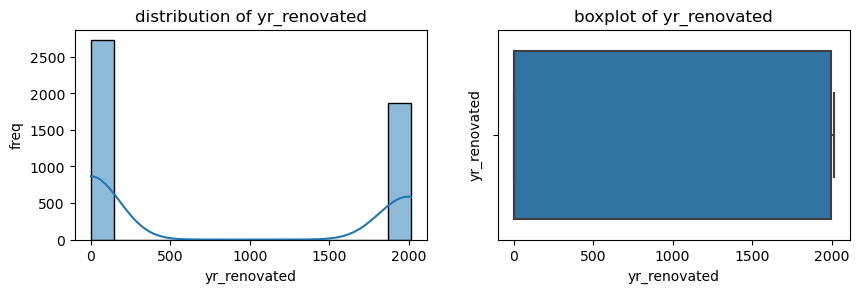

In [11]:
for column in df.columns:
    if df[column].dtype!="object":
        plt.figure(figsize=(10,6))
        plt.subplot(2,2,1)
        sns.histplot(data=df,x=column,kde=True)
        plt.ylabel("freq")
        plt.xlabel(column)
        plt.title(f"distribution of {column}")
        plt.subplot(2,2,2)
        sns.boxplot(data=df,x=column)
        plt.ylabel(column)
        plt.title(f"boxplot of {column}")
        plt.show()

In [12]:
df[df.price==df.price.max()]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
4350,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0


In [13]:
df[df.price==df.price.min()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
4354,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0
4356,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001
4357,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983
4358,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0
4361,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0
4362,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009
4374,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0
4376,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001
4382,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0
4383,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923


In [14]:
df[(df.bedrooms==1)&(df.floors==1)][["price"]]

,price
260,250000.0
477,235000.0
784,350000.0
969,458000.0
1018,194000.0
1051,420850.0
1140,275000.0
1219,80000.0
1238,527550.0
1663,250000.0


In [15]:
len(df[df.yr_built==2014])

78

In [16]:
x=df.drop("price",axis=1)
y=df.price

In [17]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y.values.reshape(-1,1))

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41,shuffle=True)

In [19]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(3680, 12)
(3680, 1)
(920, 12)
(920, 1)


In [20]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=model.predict(x_test)

In [22]:
model.score(x_train,y_train)

0.18526037232027537

In [23]:
model.score(x_test,y_test)

0.5040499104360937

In [24]:
mean_squared_error(y_test,y_pred)

0.24747284079459347

In [25]:
r2_score(y_test,y_pred)

0.5040499104360937

In [26]:
model2=Ridge(alpha=0.001)
model2.fit(x_train,y_train)

Ridge(alpha=0.001)

In [27]:
model2.score(x_train,y_train)

0.18526037232026404

In [28]:
model2.score(x_test,y_test)

0.5040498797137041

In [29]:
y_pr=model2.predict(x_test)

In [30]:
mean_squared_error(y_pr,y_test)

0.24747285612467845

In [31]:
r2_score(y_pr,y_test)

-0.21419027477492203

In [32]:
reg=RandomForestRegressor(n_estimators=400)
reg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=400)

In [33]:
reg.score(x_train,y_train)

0.8816405187028404

In [34]:
reg.score(x_test,y_test)

-0.650171559083524

In [36]:
ytst_pr=reg.predict(x_test)

In [37]:
r2_score(y_test,ytst_pr)

-0.650171559083524

In [38]:
m=SVR(C=10,gamma="auto")
m.fit(x_train,y_train)
m.score(x_train,y_train)

0.26566394013250116

In [39]:
m.score(x_test,y_test)

0.35047100539913745

In [40]:
cross_val_score(SVR(C=10,gamma="auto"),x,y,cv=3)

array([0.47593739, 0.39748057, 0.02537647])